# Part III - Two layer FC network Sigmoid function included with Stochastic Gradient Descend

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)


K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0

mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

H = 200  #Hidden layers
std=1e-5
w1 = std*np.random.randn(Din, H)
b1 = np.zeros(H)
w2 = std*np.random.randn(H, K)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
batch_size = 500

iterations = 300
batch_iterations = int(Ntr/batch_size)
lr = 1.6e-2
lr_decay= 0.998
reg = 5e-6

batch_loss_history = []
batch_train_acc_history = []
val_loss_history = []   #testing set loss history
val_acc_history = []     #testing set accuracy history

seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)

    indices = np.split(indices, batch_iterations)

    for i in range(batch_iterations):

        # Forward pass
        x = x_train[indices[i]]
        y = y_train[indices[i]]
        a = x.dot(w1)+b1
        h = 1.0/(1+np.exp(-a))
        y_pred = h.dot(w2)+b2

        batch_loss = 1./batch_size*np.square(y_pred-y).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1))
        batch_accuracy =1/batch_size*(np.abs(np.argmax(y,axis=1)==np.argmax(y_pred,axis=1))).sum()

        batch_loss_history.append(loss)
        batch_train_acc_history.append(accuracy)

        # Backward pass
        dy_pred = 1./batch_size*2.0*(y_pred-y)
        dw2 = h.T.dot(dy_pred)+reg*w2
        db2 = dy_pred.sum(axis=0)
        dh = dy_pred.dot(w2.T)
        dw1 = x.T.dot(dh*h*(1-h))+reg*w1
        db1 = (dh*h*(1-h)).sum(axis=0)

        #loss and accuracy values of the test set in each epoch; this doesnt contribute for the learning of the network
        a_test = x_test.dot(w1)+b1
        h_test = 1.0/(1+np.exp(-a_test))
        test_y_pred = h_test.dot(w2)+b2
        test_loss = 1./Nte*np.square(test_y_pred-y_test).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1))
        test_accuracy =1/Nte*(np.abs(np.argmax(y_test,axis=1)==np.argmax(test_y_pred,axis=1))).sum()

        val_loss_history.append(test_loss)
        val_acc_history.append(test_accuracy)


        w2-=lr*dw2
        b2-=lr*db2
        w1-=lr*dw1
        b1-=lr*db1
        lr*=lr_decay

        # Printing losses and accuracies
        if i%10==0:
            print('iteration %d / %d : batch_iteration %d / %d : loss %f : accuracy %f : test_loss %f : test_accuracy %f '%(t,iterations,i,batch_iterations,batch_loss,batch_accuracy,test_loss,test_accuracy))

    # Printing losses and accuracies
    #if t%10==0:
      #  print('iteration %d / %d : loss %f : accuracy %f : test_loss %f : test_accuracy %f '%(t,iterations,loss,accuracy,test_loss,test_accuracy))







tion 284 / 300 : batch_iteration 60 / 100 : loss 0.670247 : accuracy 0.546000 : test_loss 0.729373 : test_accuracy 0.468400 
iteration 284 / 300 : batch_iteration 70 / 100 : loss 0.655638 : accuracy 0.572000 : test_loss 0.729373 : test_accuracy 0.468400 
iteration 284 / 300 : batch_iteration 80 / 100 : loss 0.669424 : accuracy 0.522000 : test_loss 0.729373 : test_accuracy 0.468400 
iteration 284 / 300 : batch_iteration 90 / 100 : loss 0.656405 : accuracy 0.560000 : test_loss 0.729373 : test_accuracy 0.468400 
iteration 285 / 300 : batch_iteration 0 / 100 : loss 0.656667 : accuracy 0.562000 : test_loss 0.729373 : test_accuracy 0.468400 
iteration 285 / 300 : batch_iteration 10 / 100 : loss 0.657476 : accuracy 0.544000 : test_loss 0.729373 : test_accuracy 0.468400 
iteration 285 / 300 : batch_iteration 20 / 100 : loss 0.664569 : accuracy 0.564000 : test_loss 0.729373 : test_accuracy 0.468400 
iteration 285 / 300 : batch_iteration 30 / 100 : loss 0.660934 : accuracy 0.566000 : test_loss 0

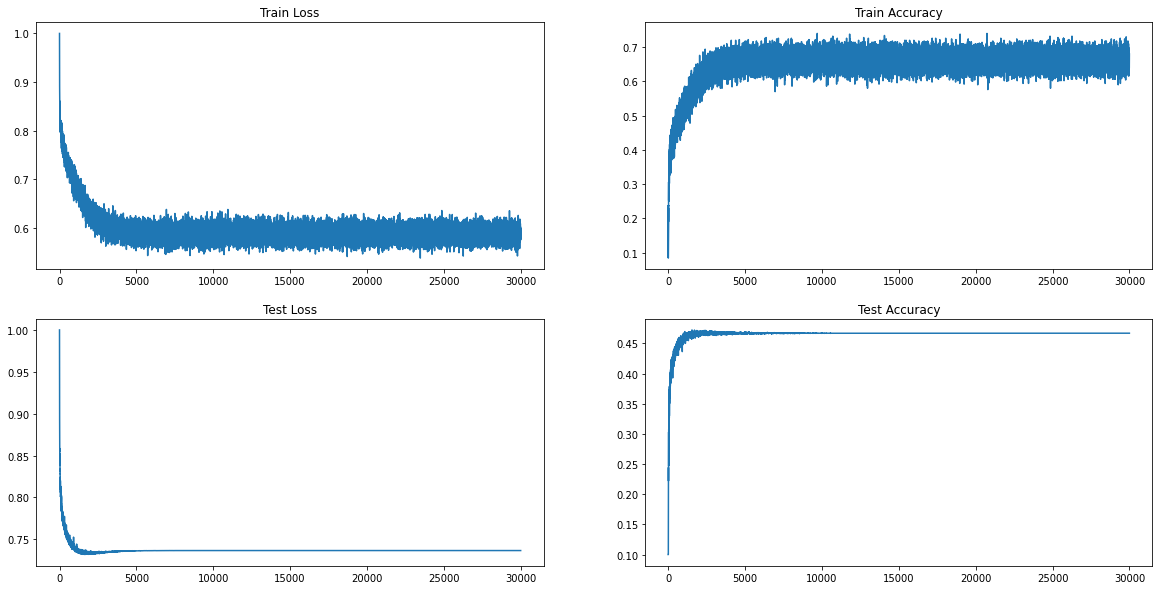

In [30]:
fig,ax = plt.subplots(2,2,figsize=(10,15))
ax[0,0].plot(loss_history)

ax[0,0].set_xlabel('Mini-batch iterations')
ax[0,0].set_ylabel('Loss')
#ax[0].set_ylim([0,1])
ax[0,0].set_title('Training Loss')


ax[0,1].plot(val_loss_history)

ax[0,1].set_xlabel('Mini-batch iterations')
ax[0,1].set_ylabel('Loss')
#ax[0].set_ylim([0,1])
ax[0,1].set_title('Testing Loss')

ax[1,0].set_xlabel('Mini-batch iterations')
ax[,0].set_ylabel('Accuracy')
#ax[0].set_ylim([0,1])
ax[0,0].set_title('Training Accuracy')


ax[1,1].plot(val_acc_history)

ax[1,1].set_xlabel('Mini-batch iterations')
ax[1,1].set_ylabel('Accuracy')
#ax[0].set_ylim([0,1])
ax[1,1].set_title('Testing Accuracy')


plt.show()

In [31]:
x_t = x_train
print('x_train->',x_t.shape)
a = x_t.dot(w1)+b1
h = 1.0/(1+np.exp(-a))
y_pred = h.dot(w2)+b2

train_acc = 1/Ntr*(np.abs(np.argmax(y_train,axis=1)==np.argmax(y_pred,axis=1))).sum()
print('train_acc = ',train_acc)


x_t = x_test
print('x_test->',x_t.shape)
a = x_t.dot(w1)+b1
h = 1.0/(1+np.exp(-a))
y_pred = h.dot(w2)+b2

test_acc = 1/Nte*(np.abs(np.argmax(y_test,axis=1)==np.argmax(y_pred,axis=1))).sum()
print('test_acc = ',test_acc)

x_train-> (50000, 3072)
train_acc =  0.66288
x_test-> (10000, 3072)
test_acc =  0.467
